# Home assignment 03
### Description
This assignment asks you to implement an approach (or use the implemented one;) ) capable of solving the *continious action space* environments. We've discussed several of them on the lectures.

### Environment:
The environment will be "rather" simple – it is [Half-Cheetah](https://www.gymlibrary.ml/environments/mujoco/half_cheetah/), which is open and available since Fall 2021.
Please, read carefully the environment description before interacting with it!

### More complex plan:
If this environment seems too simple, you might switch to a bit more complex version: [`Ant-v2` by MuJoCo](https://www.gymlibrary.ml/environments/mujoco/ant/).

### Pipeline:
We suggest the following pipeline: First check the environment and try interacting with it with your own hands (just passing different actions and checking the results). Then use one of the appropriate approaches. And add some bells and whistles (Multiple-agent trick, Experience replay, ...) if needed.

### Criteria:
You can treat the environment solved if your score is $\geq 1000$. Great results are somewhere around $1500$, but they are not necessary to achieve.

Of course, you can continue training even further.
It should take about 30 minutes on GPU to converge (if everything is fine, of course).


### Extra problem (and potential project):
For brave and true: after solving this assignment you can switch to the more challenging task: [Humanoid](https://www.gymlibrary.ml/environments/mujoco/humanoid/) locomotion. It can be used as a project problem as well.


**Good luck!**

Some technical imports come below. It might ask you to restart the environment (Colab) once, which is fine.

In [ ]:
!apt-get install -y libgl1-mesa-dev libgl1-mesa-glx libglew-dev libosmesa6-dev software-properties-common
!apt-get install -y patchelf
!pip install gym
!pip install free-mujoco-py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.18).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.

In [ ]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

Selecting previously unselected package xvfb.
(Reading database ... 155246 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Starting virtual X frame buffer: Xvfb.


In [ ]:
from matplotlib import pyplot as plt
import mujoco_py
import gym
import time
import torch

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

In [ ]:
env_name = 'HalfCheetah-v2'
env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
scale = float(env.action_space.high[0])

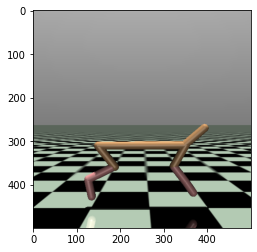

In [ ]:
env.reset()
plt.imshow(env.render("rgb_array"))

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
# YOUR CODE HERE

To record video use the next cell. The code is similar to the one we've used before.

In [ ]:
import sys, os
from gym.wrappers import Monitor
monitor_env = Monitor(gym.make(env_name), './video/', force=True)
evaluate(agent, monitor_env, episodes=10)
monitor_env.close()
from IPython.display import HTML

video_names = list(filter(lambda s: s.endswith(".mp4"), os.listdir("./video/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("./video/"+video_names[-1]))